In [4]:
"""Code to produce the impact sequence gif. Requires imageio."""
import os
import imageio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

R_MOON = 1737  # [km]

# Set Paths
# fpath = os.path.abspath(os.path.dirname(__file__)) + os.sep
fpath = '/home/cjtu/projects/essi21/code/'
outdir = os.path.abspath(fpath + '../figs/') + os.sep
gifname = 'impact_sequence'  # no extension

# Crater file to read and columns of csv
fcraters = os.path.abspath(fpath + '../data/cannon2020_crater_ages.csv')
cols = ('cname', 'lat', 'lon', 'diam', 'age', 'age_low', 'age_upp')

# Set options
show_frames = False  # True: pause and show every frame
gridsize = 400  # [km]
crater_color = 'tab:green'
ejecta_color = 'tab:orange'
old_crater_color = 'tab:gray'

# Format Matplotlib
plt.rcParams.update({
    'figure.figsize': (8, 8),
    'figure.facecolor': 'white',
    'xtick.top': True,
    'xtick.direction': 'in',
    'ytick.right': True,
    'ytick.direction': 'in',
})

def latlon2xy(lat, lon, rp=R_MOON):
    """Return (x, y) from pole in units of rp from (lat, lon) [degrees]."""
    lat, lon = np.deg2rad(lat), np.deg2rad(lon)
    y = rp * np.cos(lat) * np.cos(lon)
    x = rp * np.cos(lat) * np.sin(lon)
    return x, y


In [8]:
# Read in Cannon 2020 crater list and sort by age
df = pd.read_csv(fcraters, names=cols, header=0)
df['x'], df['y'] = latlon2xy(df.lat, df.lon)
sdf = df.sort_values('age', ascending=False).reset_index(drop=True)

sdf.head()

,cname,lat,lon,diam,age,age_low,age_upp,x,y
0,Haworth,-87.5,354.8,51.4,4.18,0.02,0.02,-6.866947,75.455050
1,Shoemaker,-88.1,45.9,51.8,4.15,0.02,0.02,41.357285,40.077997
2,Faustini,-87.2,84.3,42.5,4.10,0.03,0.03,84.432505,8.427484
3,Amundsen,-84.4,83.1,103.4,3.90,0.10,0.10,168.273855,20.363374
4,Cabeus B,-82.3,305.4,59.6,3.90,0.10,0.10,-189.707956,134.818427


In [19]:
w = 'World'
e = '!'
num = np.pi
print(f'Hello {num:.3f}')

Hello 3.142


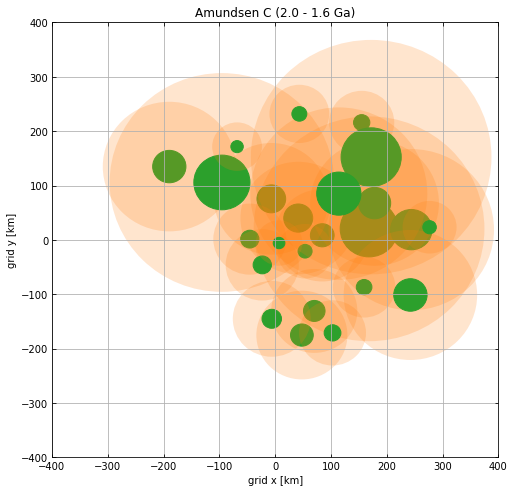

In [32]:
# Generate matplotlib frames
fig, ax = plt.subplots()
ax.grid()
ax.set_xlabel('grid x [km]')
ax.set_ylabel('grid y [km]')
ax.set_xlim(-gridsize, gridsize)
ax.set_ylim(-gridsize, gridsize)

fnames = []
for i, row in sdf.iterrows():
    # Get crater params from DataFrame
    name = row.cname
    x, y, rad = row.x, row.y, row.diam / 2
    agelow = f'{row.age - row.age_low:.1f}'
    ageupp = f'{row.age + row.age_upp:.1f}'
    age = f'{ageupp} - {agelow} Ga'
    if agelow == ageupp:
        age = f'{agelow} Ga'
    
    # Draw crater and ejecta zone
    ejecta = plt.Circle((x, y), rad*4, lw=0, color=ejecta_color, alpha=0.2)
    ax.add_patch(ejecta)
    crater = plt.Circle((x, y), rad, color=crater_color)
    ax.add_patch(crater)

    # Set frame title
    title = f'{name} ({age})'
    ax.set_title(title)

    # Show fig and wait for input
    if show_frames:
        plt.draw()
        plt.pause(0.001)
        input("Press [enter] to continue.")
        plt.show()

    # # Save frame
    # fname = f'{outdir}{gifname}_frame{i}.png'
    # fig.savefig(fname, bbox_inches='tight')
    # fnames.append(fname)

    # # Remove crater and ejecta & replot crater in different color
    # ax.patches = ax.patches[:-2]
    # crater = plt.Circle((x, y), rad, color=old_crater_color)
    # ax.add_patch(crater)

# Stich saved frames into gif with imageio
# images = [imageio.imread(fname) for fname in fnames]
# imageio.mimsave(f'{outdir}{gifname}.gif', images, duration=0.75)

# # Clean up frames
# for fname in fnames:
#     os.remove(fname)
